In [66]:
import pandas as pd
import numpy as np
from datetime import datetime

df = pd.read_excel('./cleaned_data.xlsx')

In [58]:
df.head()

,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
0,5533,10,กรุงเทพมหานคร,1,พระนคร,4,ENTERTAIN,33640,2021-10-01,1
1,5534,10,กรุงเทพมหานคร,1,พระนคร,5,GOVERNMENT,46032,2021-10-01,1
2,5535,10,กรุงเทพมหานคร,1,พระนคร,6,INSTITUTION,4042,2021-10-01,1
3,5536,10,กรุงเทพมหานคร,1,พระนคร,7,CONSTRUCT,3210,2021-10-01,1
4,5580,10,กรุงเทพมหานคร,1,พระนคร,2,BUSINESS,232488,2021-10-01,1


In [67]:
df = df.replace(r'^\s*$', np.nan, regex=True)
cleaned_df = df.dropna(subset=['province_code','amphur_code'],how='any')
cleaned_df = cleaned_df.sort_values(['province_code', 'amphur_code', 'class_group_code', 'YYMM'],
              ascending = [True, True, True, True])
cleaned_df.head()

,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
5,8213,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,164415,2021-10-01,1
486,10614,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,169733,2021-11-01,1
968,10539,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,167071,2021-12-01,1
1449,9080,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,168906,2022-01-01,1
1929,9703,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,172480,2022-02-01,1


In [68]:
for i in range(len(cleaned_df)):
    cleaned_df['YYMM'][i] = cleaned_df['YYMM'][i].date().strftime("%m/%y")
cleaned_df.head()

d:\venv\general\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
5,8213,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,164415,10/21,1
486,10614,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,169733,11/21,1
968,10539,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,167071,12/21,1
1449,9080,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,168906,01/22,1
1929,9703,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,172480,02/22,1


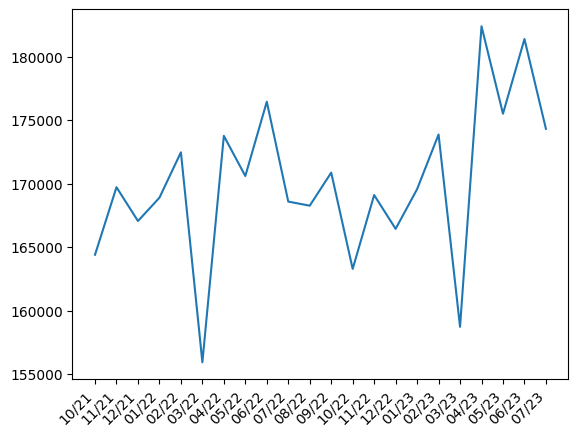

In [69]:
p10_a1_c_1 = cleaned_df.loc[(cleaned_df['province_code'] == 10) & (cleaned_df['amphur_code'] == 1) & (cleaned_df['class_group_code'] == 1)]

import matplotlib.pyplot as plt
plt.plot(p10_a1_c_1['YYMM'],p10_a1_c_1['consumption'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [70]:
dataset = p10_a1_c_1[['consumption']].copy().reset_index(drop=True)
dataset.rename(columns = {'consumption': 'x'}, inplace = True)
dataset['y'] = dataset['x'].copy().shift(-1)
dataset = dataset[:-1]
dataset

,x,y
0,164415,169733.0
1,169733,167071.0
2,167071,168906.0
3,168906,172480.0
4,172480,155949.0
5,155949,173775.0
6,173775,170614.0
7,170614,176461.0
8,176461,168600.0
9,168600,168277.0


In [71]:
lag_range = 3

dataset_lag = p10_a1_c_1[['consumption']].copy().reset_index(drop=True)
dataset_lag.rename(columns = {'consumption': 'x'}, inplace = True)
for i in range(lag_range):
    dataset_lag['x'+str(i)] = dataset_lag['x'].copy().shift(-i)
dataset_lag['y'] = dataset_lag['x'].copy().shift(-(lag_range))
dataset_lag = dataset_lag[:-lag_range]
dataset_lag = dataset_lag.drop(columns='x')
dataset_lag

,x0,x1,x2,y
0,164415,169733.0,167071.0,168906.0
1,169733,167071.0,168906.0,172480.0
2,167071,168906.0,172480.0,155949.0
3,168906,172480.0,155949.0,173775.0
4,172480,155949.0,173775.0,170614.0
5,155949,173775.0,170614.0,176461.0
6,173775,170614.0,176461.0,168600.0
7,170614,176461.0,168600.0,168277.0
8,176461,168600.0,168277.0,170881.0
9,168600,168277.0,170881.0,163303.0


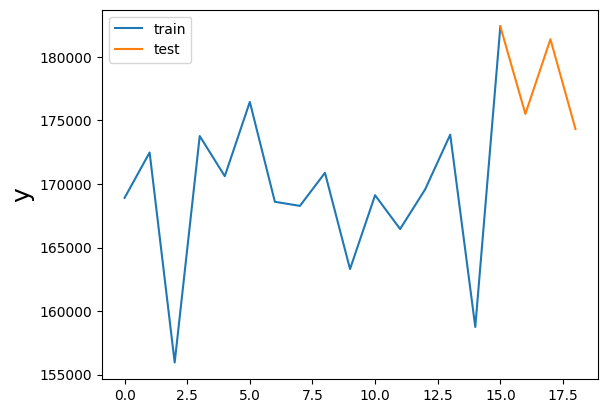

In [72]:
df_train = dataset_lag.loc[:int(len(dataset_lag)*0.8),:]
df_test = dataset_lag.loc[int(len(dataset_lag)*0.8):,:]

plt.plot(df_train.index,df_train['y'])
plt.plot(df_test.index,df_test['y'])
plt.ylabel('y',fontsize=18)
plt.legend(['train','test'])
plt.show()

In [65]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.H2OFrame(df_train)
test = h2o.H2OFrame(df_test)

# Identify predictors and response
x = train.columns
y = "y"
x.remove(y)

# # For binary classification, response should be a factor
# train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=10, seed=123)
aml.train(x=x, y=y, training_frame=train, leaderboard_frame = test)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Checking whether there is an H2O instance running at http://localhost:54321.

KeyboardInterrupt: 

In [ ]:
leader_model = aml.leader
test_predict = leader_model.predict(test)
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['y'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(test_predict,use_pandas=True)
df_results.head()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,ground_truth,predictions
0,182400.0,181608.688148
1,175517.0,169736.830520
2,181398.0,173151.316295
3,174328.0,169666.083842


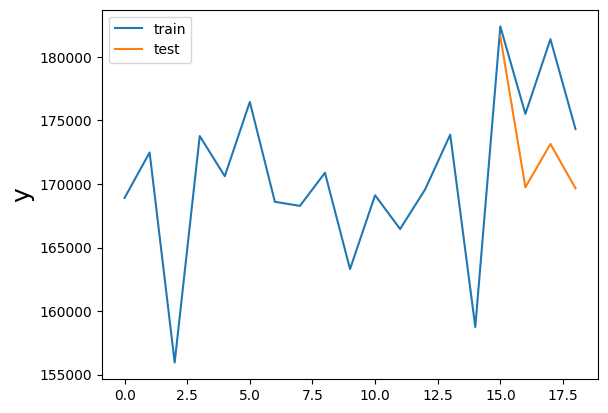

2.73686536949798

In [ ]:
plt.plot(dataset_lag.index,dataset_lag['y'])
plt.plot(df_test.index,df_results['predictions'])
plt.ylabel('y',fontsize=18)
plt.legend(['train','test'])
plt.show()

def mape(a, b):
    mask = a != 0
    return (abs(a-b)/a)[mask].mean()

mape(df_results['ground_truth'],df_results['predictions'])*100

In [74]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

def auto_ml(df_train, df_test):
    # Import a sample binary outcome train/test set into H2O
    train = h2o.H2OFrame(df_train)
    test = h2o.H2OFrame(df_test)

    # Identify predictors and response
    x = train.columns
    y = "y"
    x.remove(y)

    # Run AutoML for 20 base models
    aml = H2OAutoML(max_models=10, seed=30, max_runtime_secs = 120,include_algos = ["GLM", "DRF", "GBM","StackedEnsemble"])
    aml.train(x=x, y=y, training_frame=train, leaderboard_frame = test)

    # View the AutoML Leaderboard
    lb = aml.leaderboard
    print(lb.head(rows=lb.nrows))  # Print all rows instead of default (10 rows)
    
    leader_model = aml.leader
    test_predict = leader_model.predict(test)
    df_results = pd.DataFrame()
    df_results['ground_truth'] = df_test['y'].reset_index(drop=True)
    df_results['predictions'] = h2o.as_list(test_predict,use_pandas=True)
    print(df_results.head(3))

    plt.plot(dataset_lag.index,dataset_lag['y'])
    plt.plot(df_test.index,df_results['predictions'])
    plt.ylabel('y',fontsize=18)
    plt.legend(['train','test'])
    plt.show()

    def mape(a, b):
        mask = a != 0
        return (abs(a-b)/a)[mask].mean()

    print("MAPE:",mape(df_results['ground_truth'],df_results['predictions'])*100)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 3 mins
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_pornthep_sar_cm8hw3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.739 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%

20:10:06.631: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 16.0.
20:10:06.680: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 16.0.
20:10:06.681: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 16.0.
20:10:06.681: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 16.0.

model_id                                                    rmse          mse      mae      rmsle    mean_resid

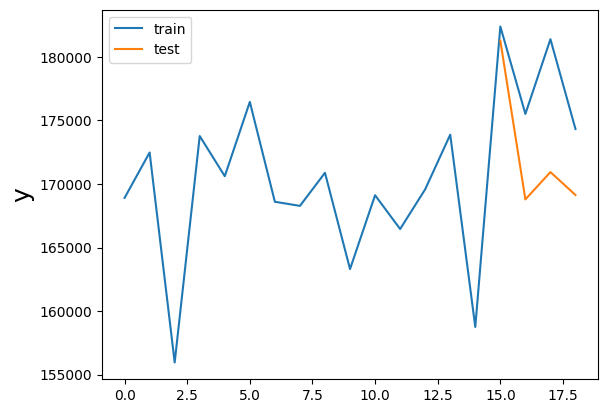

MAPE: 3.2982221417748545


In [75]:
auto_ml(df_train, df_test)